In [35]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import re
import math

googleplay_data_main = pd.read_excel('GooglePlaystore.xlsx')

### <font color="brown">Pre-Processing</font>

In [36]:
#Question 1 - Often there are outliers which do not match the overall data type. There is one record in this data where the 
#"Reviews" has value "3.0M" which does not match the rest of the data. Remove that record.

googleplay_data = googleplay_data_main.drop(googleplay_data_main[googleplay_data_main["Reviews"] == "3.0M"].index[0])

In [37]:
#Question 2 - Remove rows where any of the columns has the value "Varies with device".

indexes_todrop = googleplay_data[googleplay_data.apply(lambda row: row.astype(str).str.contains("Varies with device").any(), axis=1)]
indexes_todrop = indexes_todrop.index.values
googleplay_data = googleplay_data.drop(indexes_todrop)

In [38]:
#Question 3 - The values in the Android version column should be floats. Strip the trailing non-numeric characters from all values (ie. the words " and up"), so the result is a number. 
#If there are multiple decimal places (eg. "x.y.z"), keep only the first two parts (eg "x.y"). 
#For example, the value "4.1 and up" should be changed to "4.1". The value "4.5.6 and up" should be changed to "4.5". The value "5.6.7" should be changed to "5.6".

newcol_android_ver = []

for token in googleplay_data['Android Ver'].tolist():
    if str(token) != 'nan':
        res = re.match(r'(\d.\d)',token)
        newcol_android_ver.append(res[0])
    else:
        newcol_android_ver.append(token)

googleplay_data['Android Ver'] = newcol_android_ver

In [39]:
#Question 4 - The "Installs" column must have integer values. For values that have commas, remove the commas. 
#For values that have a '+' at the end, remove the '+'. Keep only those rows that have an integer value after these edits.

newcol_installs = []

for token in googleplay_data['Installs'].tolist():
    if str(token) != 'nan':
        res = re.sub('\D+','',token)
        newcol_installs.append(int(res))
    else:
        newcol_installs.append(int(token))

googleplay_data['Installs'] = newcol_installs

In [40]:
#Question 5 - For missing rating values, if the number of reviews is less than 100 and installations is less than 50000, remove the row.

Row_drops = googleplay_data[googleplay_data['Rating'].isnull()][['Reviews','Installs']]

index_set = set(Row_drops[Row_drops['Installs'] < 50000].index)
index_set.update(Row_drops[Row_drops['Reviews'] < 100].index)
googleplay_data = googleplay_data.drop(index_set)

In [41]:
#Question 5
#fill the missing value with the average value (rounded to 2 decimal places) for the Category of that row.

cat_avgs = googleplay_data.groupby('Category').describe()['Rating']['mean']

newcol_Rating = []

for rating,cat in zip(googleplay_data['Rating'],googleplay_data['Category']):
    if math.isnan(rating):
        newcol_Rating.append(round(cat_avgs[cat_avgs.index==cat][0],2))
    else:
        newcol_Rating.append(rating)

googleplay_data['Rating'] = newcol_Rating

In [42]:
#Question 6 -Preprocess the Size column to convert the "M" (millions) and "K" (thousands) values into integers. 
#For instance, 8.7M should be converted to 8700000 and 2.4K should be converted to 2400.

newcol_size = []

for token in googleplay_data['Size'].tolist():
    if str(token) != 'nan':
        letters = re.findall('\D+',token)
        letters = list(map(str.upper,letters))
        res = re.sub('\.*','',token)
        if 'M' in letters:
            newcol_size.append(re.sub('\D+','00000',res))
        if 'K' in letters:
            newcol_size.append(re.sub('\D+','00',res))
    else:
        newcol_size.append(token)

googleplay_data['Size'] = newcol_size

### <font color="brown">Analysis Part</font>

In [43]:
# Describe (use DataFrame describe method) the category wise rating statistics. In other words, for each category, 
#describe the statistics (count, mean, etc.) for ratings in that category.

googleplay_data.groupby('Category').describe()['Rating']

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
ART_AND_DESIGN,58.0,4.358621,0.368513,3.2,4.100,4.40,4.700,5.0
AUTO_AND_VEHICLES,62.0,4.146774,0.569935,2.1,3.900,4.25,4.500,4.9
BEAUTY,40.0,4.291750,0.356175,3.1,4.075,4.30,4.525,4.9
BOOKS_AND_REFERENCE,145.0,4.320138,0.456219,2.7,4.100,4.40,4.600,5.0
BUSINESS,245.0,4.119184,0.663942,1.0,3.800,4.30,4.500,5.0
COMICS,49.0,4.154082,0.550363,2.8,3.800,4.40,4.600,5.0
COMMUNICATION,209.0,4.100957,0.503831,1.0,3.900,4.20,4.400,5.0
DATING,173.0,3.957803,0.666132,1.0,3.600,4.10,4.400,5.0
EDUCATION,110.0,4.392636,0.254395,3.5,4.300,4.40,4.600,4.9


In [44]:
#Extract all "Free" apps from the master data frame. Then write a function that, given a numeric column e.g 'Rating'), 
#will create and return a dataframe for the top 3 free applications in each category based on that column. Call the function on each of these columns:

def top_three(x):
    
    free_apps_df = googleplay_data[googleplay_data['Type'] == 'Free']
    
    free_apps_df = pd.concat([free_apps_df[['Category','App']],x], axis=1)
    
    Categories = free_apps_df.sort_values(by='Category')['Category'].unique()
    
    result = pd.DataFrame()
    
    for cat in Categories:
        temp_df = free_apps_df[free_apps_df['Category'] == cat]
        temp_df = temp_df[['Category','App',x.name]].sort_values(by=x.name, ascending=False)[:3]
        result = result.append(temp_df)

    return result


In [45]:
top_three(googleplay_data['Rating'])

,Category,App,Rating
8888,ART_AND_DESIGN,Spring flowers theme couleurs d t space,5.0
6930,ART_AND_DESIGN,Fantasy theme dark bw black building,4.8
3982,ART_AND_DESIGN,Cardi B Wallpaper,4.8
64,AUTO_AND_VEHICLES,DMV Permit Practice Test 2018 Edition,4.9
79,AUTO_AND_VEHICLES,Tickets + PDA 2018 Exam,4.9
...,...,...,...
8459,VIDEO_PLAYERS,Video Downloader - for Instagram Repost App,4.8
5244,VIDEO_PLAYERS,AJ Player,4.8
3627,WEATHER,Weather forecast,4.8
3629,WEATHER,Live Weather Pro,4.8


In [46]:
top_three(googleplay_data['Installs'])

,Category,App,Installs
45,ART_AND_DESIGN,"Canva: Poster, banner, card maker & graphic de...",10000000
19,ART_AND_DESIGN,ibis Paint X,10000000
12,ART_AND_DESIGN,Tattoo Name On My Photo Editor,10000000
8289,AUTO_AND_VEHICLES,AutoScout24 - used car finder,10000000
70,AUTO_AND_VEHICLES,Fines of the State Traffic Safety Inspectorate...,5000000
...,...,...,...
4032,VIDEO_PLAYERS,Dubsmash,100000000
3693,VIDEO_PLAYERS,LIKE – Magic Video Maker & Community,50000000
4725,WEATHER,Weather & Clock Widget for Android,50000000
5768,WEATHER,Amber Weather,10000000


In [47]:
top_three(googleplay_data['Reviews'])

,Category,App,Reviews
19,ART_AND_DESIGN,ibis Paint X,224399
18,ART_AND_DESIGN,FlipaClip - Cartoon animation,194216
45,ART_AND_DESIGN,"Canva: Poster, banner, card maker & graphic de...",174531
79,AUTO_AND_VEHICLES,Tickets + PDA 2018 Exam,197136
8289,AUTO_AND_VEHICLES,AutoScout24 - used car finder,186648
...,...,...,...
4038,VIDEO_PLAYERS,"DU Recorder – Screen Recorder, Video Editor, Live",2588730
4032,VIDEO_PLAYERS,Dubsmash,1971777
4725,WEATHER,Weather & Clock Widget for Android,2371543
5768,WEATHER,Amber Weather,260137


In [48]:
#Question 3. - Find the average, maximum and minimum price of the paid applications.

price_mean = googleplay_data[googleplay_data['Type'] == 'Paid']['Price'].mean()
print(f'The average price of the paid applications is: {price_mean}')
price_max = googleplay_data[googleplay_data['Type'] == 'Paid']['Price'].max()
print(f'The maximum price of the paid applications is: {price_max}')
price_min = googleplay_data[googleplay_data['Type'] == 'Paid']['Price'].min()
print(f'The minimum price of the paid applications is: {price_min}')

The average price of the paid applications is: 15.150767888307014
The maximum price of the paid applications is: 400
The minimum price of the paid applications is: 0.99


### <font color="brown">Visualization</font>

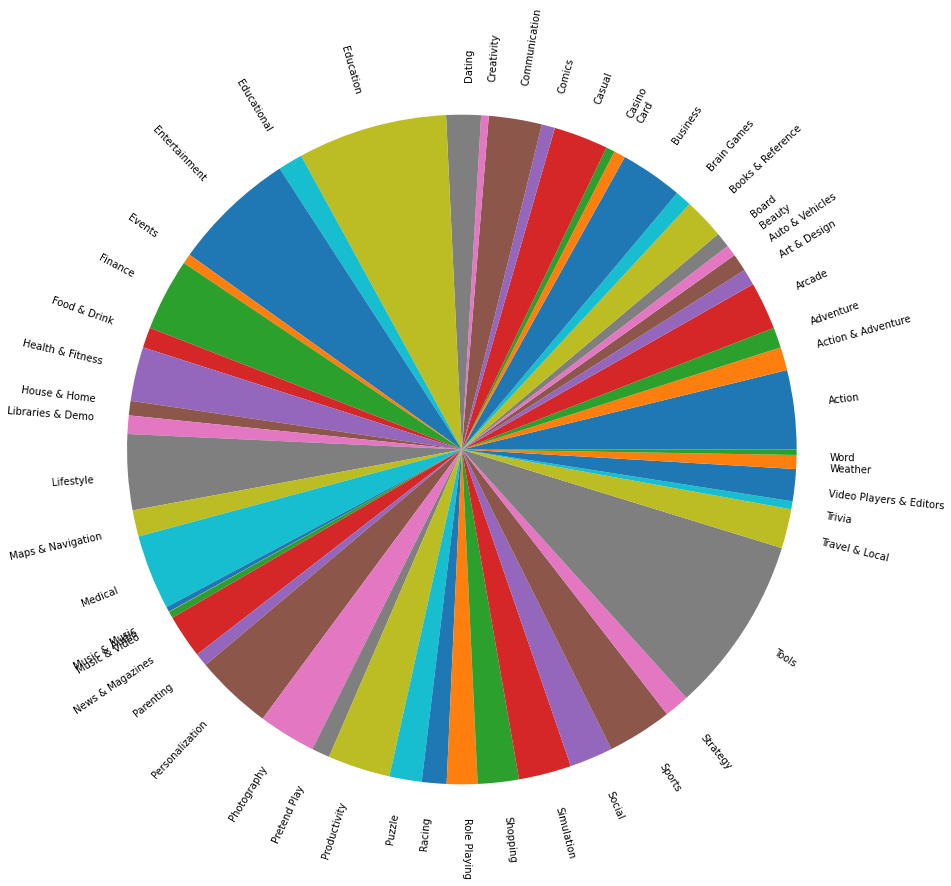

In [49]:
#Question 1 - In the genre column, break the string of genres into a list. For example, ‘Art & Design; Creativity’ should be [‘Art & Design’, Creativity’].
#Count the number of applications per genre and display it using a pie chart

df_genre = googleplay_data[['Genres','App']].groupby('Genres').describe()['App']['unique'].to_frame().reset_index()
genre_temp_column = [x.split(';') for x in df_genre['Genres']]

df_genre['Genres'] = genre_temp_column

df_genre = df_genre.explode('Genres').groupby('Genres').sum().reset_index().rename(columns={'unique': "App Count"})


y = df_genre['App Count']
mylabels = df_genre['Genres']

plt.figure(figsize=(15, 20))
plt.pie(y, labels = mylabels, rotatelabels=True)
plt.show() 

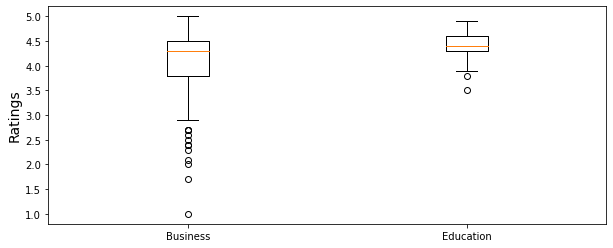

In [50]:
#Question 2 - Display a box plot of ratings for "Business" and "Education" categories. The boxplots should be in the same plot.

Ratings_education = googleplay_data[googleplay_data['Category'] == 'EDUCATION']['Rating']
Ratings_Business = googleplay_data[googleplay_data['Category'] == 'BUSINESS']['Rating']

plt.figure(figsize=(10, 4))
plt.boxplot([Ratings_Business, Ratings_education],labels=('Business','Education'))
plt.ylabel('Ratings', fontsize=14)
plt.show()